# Relatório de Análise VIII

**Identificando e Removendo Outliers**

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,8))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bases_de_dados/aluguel_residencial_atual.csv', sep=';')
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Apartamento
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Apartamento
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,33.33,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento


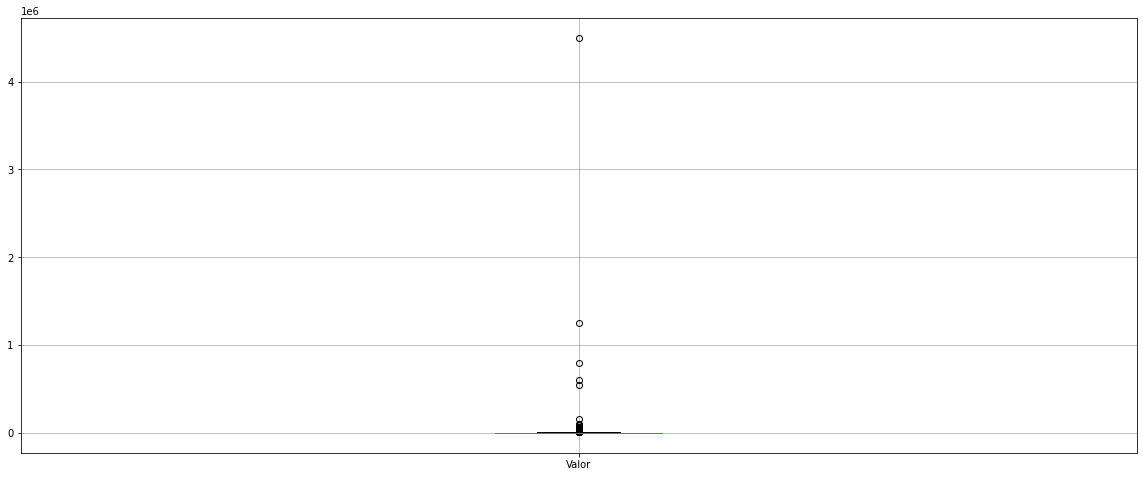

In [ ]:
df.boxplot(['Valor'])

In [ ]:
df.query('Valor > 500000')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M²,Tipo Agregado
7888,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11004,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
13090,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14316,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16047,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [ ]:
# fazendo seleções estatísticas
valor = df['Valor']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [ ]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = df[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22566,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22567,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22568,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22569,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


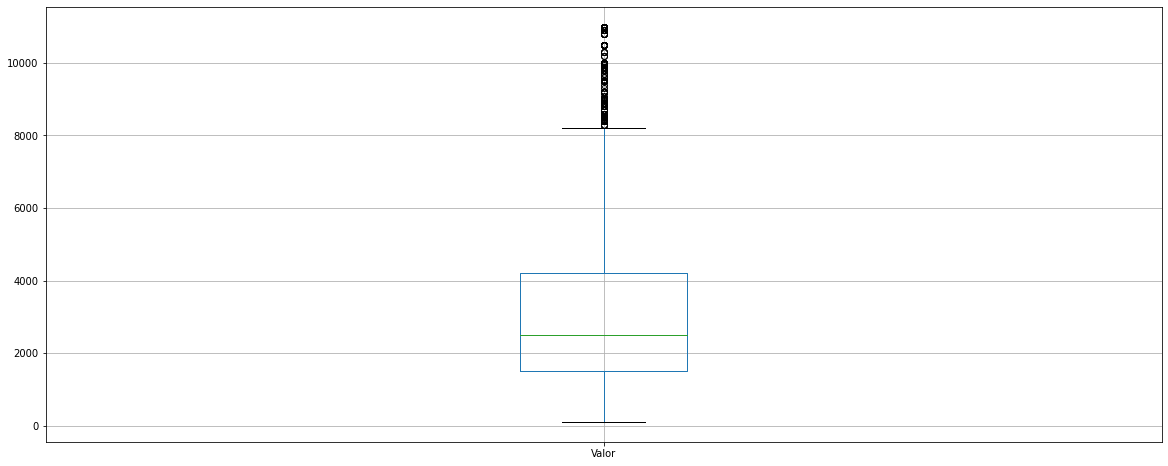

In [ ]:
dados_new.boxplot(['Valor'])